<a href="https://colab.research.google.com/github/amaluvincent/Applied-data-science-/blob/main/img_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Necessary Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Loading

In [ ]:
#Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Preprocess the data
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)



170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
# Split data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.1, random_state=42
)

In [ ]:
# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
# Print the shape of the data and labels arrays
print("Data shape:", train_images.shape)
print("Labels shape:", train_labels.shape)

Data shape: (45000, 32, 32, 3)
Labels shape: (45000, 10)


# Verify The Data
To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name

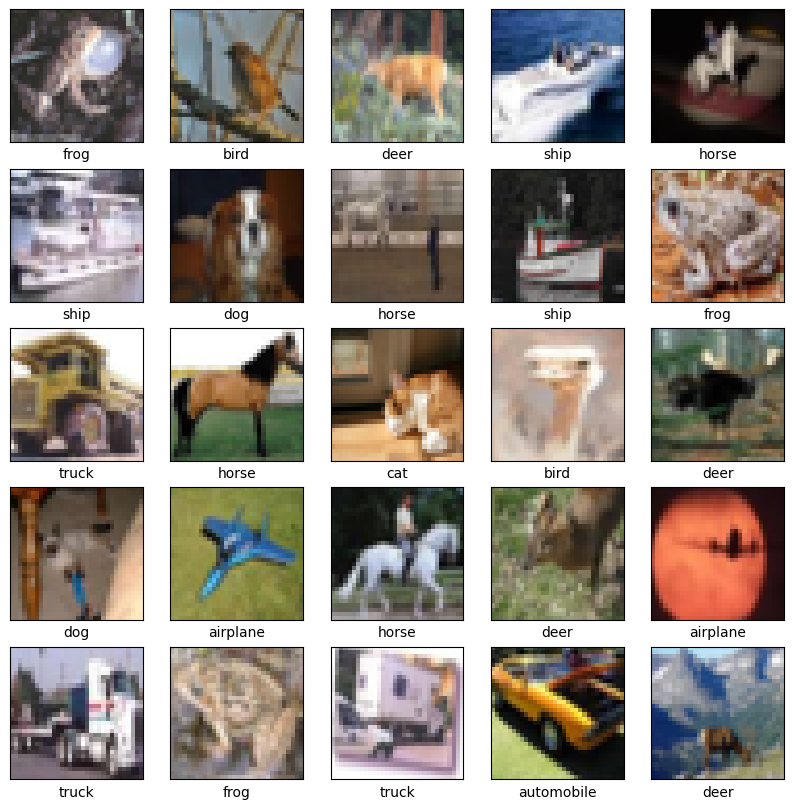

In [ ]:

label_to_index = {label: index for index, label in enumerate(class_names)}
# Display 25 random training images and their true labels
random_indices = np.random.choice(len(train_images), size=25, replace=False)
plt.figure(figsize=(10, 10))
for idx, random_index in enumerate(random_indices):
#for i in range(25):
    plt.subplot(5, 5, idx + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[random_index])  # Use the random_index here
    # Convert the one-hot encoded label to string
    label_str = class_names[np.argmax(train_labels[random_index])]
    # Get the index from the label_to_index dictionary
    label_index = label_to_index[label_str]

    plt.xlabel(class_names[label_index])
plt.show()



# Training CNN From Scratch

In [ ]:
# Training a CNN from Scratch
model_scratch = models.Sequential()
model_scratch.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_scratch.add(layers.MaxPooling2D((2, 2)))
model_scratch.add(layers.Flatten())
model_scratch.add(layers.Dense(128, activation='relu'))
model_scratch.add(layers.Dense(10, activation='softmax'))

# Compile And Train The Model

In [ ]:
model_scratch.compile(optimizer=Adam(),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

history_scratch = model_scratch.fit(train_images, train_labels, epochs=20,
                                    validation_data=(val_images, val_labels),
                                    shuffle=True, verbose=1)

Epoch 1/20
1407/1407 [==============================] - 10s 5ms/step - loss: 1.4549 - accuracy: 0.4817 - val_loss: 1.2553 - val_accuracy: 0.5544
Epoch 2/20
1407/1407 [==============================] - 6s 4ms/step - loss: 1.1541 - accuracy: 0.5948 - val_loss: 1.1741 - val_accuracy: 0.5924
Epoch 3/20
1407/1407 [==============================] - 5s 4ms/step - loss: 1.0168 - accuracy: 0.6439 - val_loss: 1.0689 - val_accuracy: 0.6212
Epoch 4/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.9111 - accuracy: 0.6813 - val_loss: 1.0552 - val_accuracy: 0.6346
Epoch 5/20
1407/1407 [==============================] - 5s 4ms/step - loss: 0.8318 - accuracy: 0.7092 - val_loss: 1.0256 - val_accuracy: 0.6498
Epoch 6/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.7558 - accuracy: 0.7367 - val_loss: 1.0347 - val_accuracy: 0.6484
Epoch 7/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.6870 - accuracy: 0.7587 - val_loss: 1.0631 - val_accuracy

In [ ]:
model_scratch.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 128)               921728    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 923914 (3.52 MB)
Trainable params: 923914 (3.52 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

# Fine-Tuning VGG16 Using Transfer Learning

In [ ]:
# Load pre-trained VGG16 model (excluding the top dense layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Freeze convolutional layers
for layer in base_model.layers[:-8]:
    layer.trainable = False

In [ ]:
# Build a new model on top of VGG16
model_transfer = models.Sequential()
model_transfer.add(base_model)
model_transfer.add(layers.Flatten())
model_transfer.add(layers.Dense(512, activation='relu'))
model_transfer.add(layers.Dropout(0.5))
model_transfer.add(layers.Dense(10, activation='softmax'))


# Compile And Train The Model

In [ ]:
model_transfer.compile(optimizer=Adam(),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

history_transfer = model_transfer.fit(train_images, train_labels, epochs=20,
                                      validation_data=(val_images, val_labels),
                                      shuffle=True, verbose=1)


Epoch 1/20
1407/1407 [==============================] - 39s 24ms/step - loss: 2.3049 - accuracy: 0.0984 - val_loss: 2.3032 - val_accuracy: 0.1006
Epoch 2/20
1407/1407 [==============================] - 33s 23ms/step - loss: 2.3029 - accuracy: 0.0968 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 3/20
1407/1407 [==============================] - 33s 23ms/step - loss: 2.3028 - accuracy: 0.0970 - val_loss: 2.3027 - val_accuracy: 0.0970
Epoch 4/20
1407/1407 [==============================] - 33s 23ms/step - loss: 2.3028 - accuracy: 0.0972 - val_loss: 2.3027 - val_accuracy: 0.0970
Epoch 5/20
1407/1407 [==============================] - 33s 23ms/step - loss: 2.3028 - accuracy: 0.0960 - val_loss: 2.3026 - val_accuracy: 0.1008
Epoch 6/20
1407/1407 [==============================] - 33s 23ms/step - loss: 2.3028 - accuracy: 0.0979 - val_loss: 2.3027 - val_accuracy: 0.1008
Epoch 7/20
1407/1407 [==============================] - 33s 23ms/step - loss: 2.3028 - accuracy: 0.0980 - val_loss: 2.3029 -

In [ ]:
model_transfer.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 14982474 (57.15 MB)
Trainable params: 13246986 (50.53 MB)
Non-trainable params: 1735488 (6.62 MB)
_________________________________________________________________


# Compare Training Histories

In [ ]:
# Plot training history for CNN from scratch
plt.figure(figsize=(16, 6))


<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

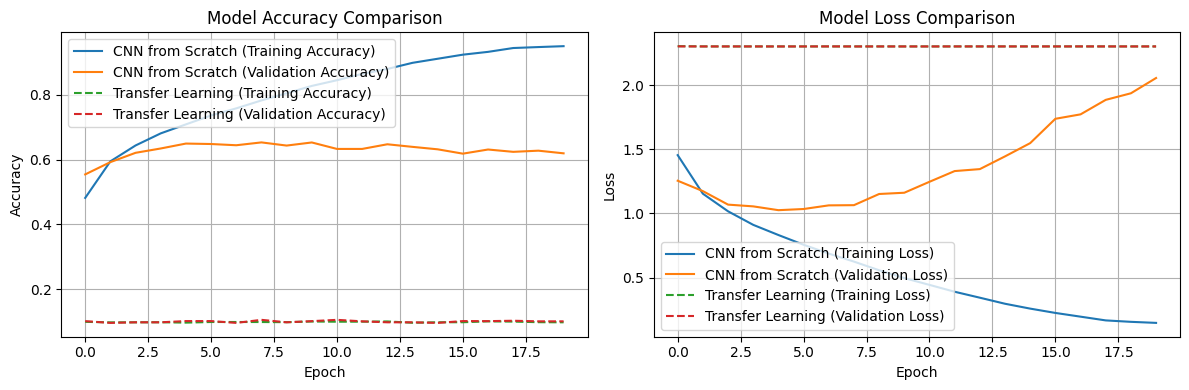

In [ ]:
# Increase the size of the subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot training accuracy for CNN from scratch
axes[0].plot(history_scratch.history['accuracy'], label='CNN from Scratch (Training Accuracy)')
axes[0].plot(history_scratch.history['val_accuracy'], label='CNN from Scratch (Validation Accuracy)')
axes[0].plot(history_transfer.history['accuracy'], label='Transfer Learning (Training Accuracy)', linestyle='dashed')
axes[0].plot(history_transfer.history['val_accuracy'], label='Transfer Learning (Validation Accuracy)', linestyle='dashed')

axes[0].set_title('Model Accuracy Comparison')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True)

# Plot training loss for CNN from scratch
axes[1].plot(history_scratch.history['loss'], label='CNN from Scratch (Training Loss)')
axes[1].plot(history_scratch.history['val_loss'], label='CNN from Scratch (Validation Loss)')
axes[1].plot(history_transfer.history['loss'], label='Transfer Learning (Training Loss)', linestyle='dashed')
axes[1].plot(history_transfer.history['val_loss'], label='Transfer Learning (Validation Loss)', linestyle='dashed')

axes[1].set_title('Model Loss Comparison')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.savefig("model_accuracy_vs_loss_comparison.png")
plt.show()


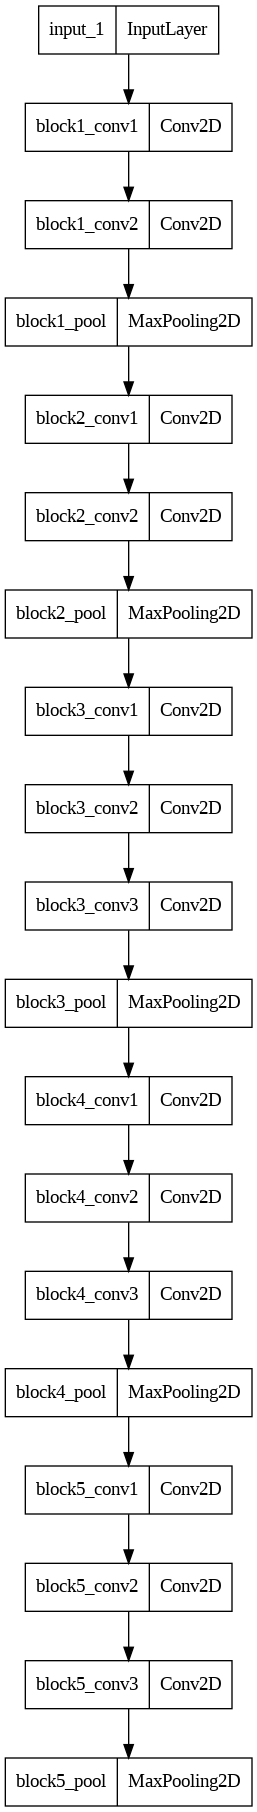

In [ ]:
# Plot the VGG16 base model architecture
plot_model(base_model, to_file='vgg16_base_model.png')


# Evaluating The Models
Evaluationg scratvh model and pre-trained models with test data and comparing the results

In [ ]:
# Evaluate the CNN from scratch on the test set
test_loss_scratch, test_acc_scratch = model_scratch.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy (CNN from Scratch): {test_acc_scratch}')

313/313 - 1s - loss: 2.1232 - accuracy: 0.6211 - 711ms/epoch - 2ms/step
Test accuracy (CNN from Scratch): 0.6211000084877014


In [ ]:
# Evaluate the fine-tuned VGG16 model on the test set
test_loss_transfer, test_acc_transfer = model_transfer.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy (Transfer Learning): {test_acc_transfer}')

313/313 - 3s - loss: 2.3026 - accuracy: 0.1000 - 3s/epoch - 9ms/step
Test accuracy (Transfer Learning): 0.10000000149011612


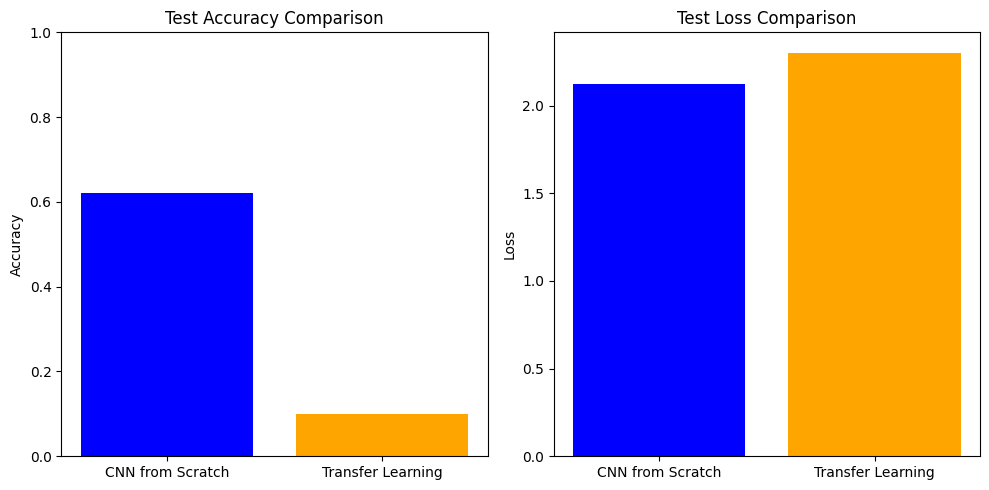

Test Accuracy (CNN from Scratch): 0.6211000084877014
Test Accuracy (Transfer Learning): 0.10000000149011612

Test Loss (CNN from Scratch): 2.123236894607544
Test Loss (Transfer Learning): 2.3026344776153564


In [ ]:
# Plot the evaluation results
plt.figure(figsize=(10, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.bar(['CNN from Scratch', 'Transfer Learning'], [test_acc_scratch, test_acc_transfer], color=['blue', 'orange'])
plt.ylim([0, 1])
plt.title('Test Accuracy Comparison')
plt.ylabel('Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.bar(['CNN from Scratch', 'Transfer Learning'], [test_loss_scratch, test_loss_transfer], color=['blue', 'orange'])
plt.title('Test Loss Comparison')
plt.ylabel('Loss')

plt.tight_layout()
plt.savefig("test_accuracy_vs_test_loss_comparison.png")
plt.show()

print(f'Test Accuracy (CNN from Scratch): {test_acc_scratch}')
print(f'Test Accuracy (Transfer Learning): {test_acc_transfer}')

print(f'\nTest Loss (CNN from Scratch): {test_loss_scratch}')
print(f'Test Loss (Transfer Learning): {test_loss_transfer}')

In [ ]:
# Function to plot images with predictions
def plot_images_with_predictions(model, images, true_labels, class_names, num_images=15):
    predictions = model.predict(images)
    predicted_labels = [class_names[np.argmax(pred)] for pred in predictions]

    plt.figure(figsize=(15, 10))
    correct_predictions = 0

    for i in range(min(num_images, len(images))):
        plt.subplot(3, 5, i + 1)
        plt.imshow(images[i])

        true_label = class_names[np.argmax(true_labels[i])]
        predicted_label = predicted_labels[i]

        # Set label color to green if true, red if false
        color = 'green' if true_label == predicted_label else 'red'

        plt.title(f'Actual: {true_label}\nPredicted: {predicted_label}', color=color)
        plt.axis('off')

        if true_label == predicted_label:
            correct_predictions += 1

    plt.show()

    # Print diagnostic information
    accuracy = correct_predictions / min(num_images, len(images))
    print(f"Number of correct predictions: {correct_predictions}/{min(num_images, len(images))}")
    print(f"Accuracy: {accuracy}")

# Prediction For Validation From Scratch

157/157 [==============================] - 0s 2ms/step


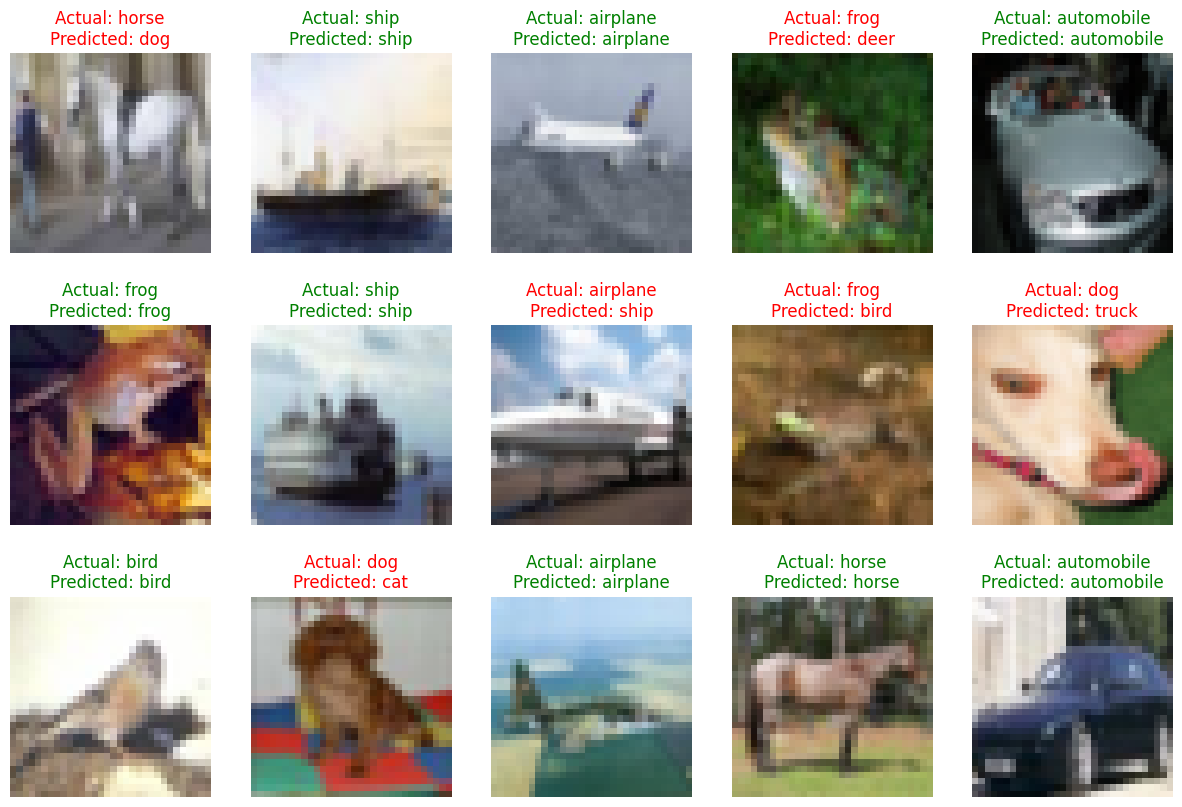

Number of correct predictions: 9/15
Accuracy: 0.6


In [ ]:
# Predict and print images for CNN trained from scratch on validation data
plot_images_with_predictions(model_scratch, val_images, val_labels, class_names)


# Prediction For Training From Scratch

1407/1407 [==============================] - 3s 2ms/step


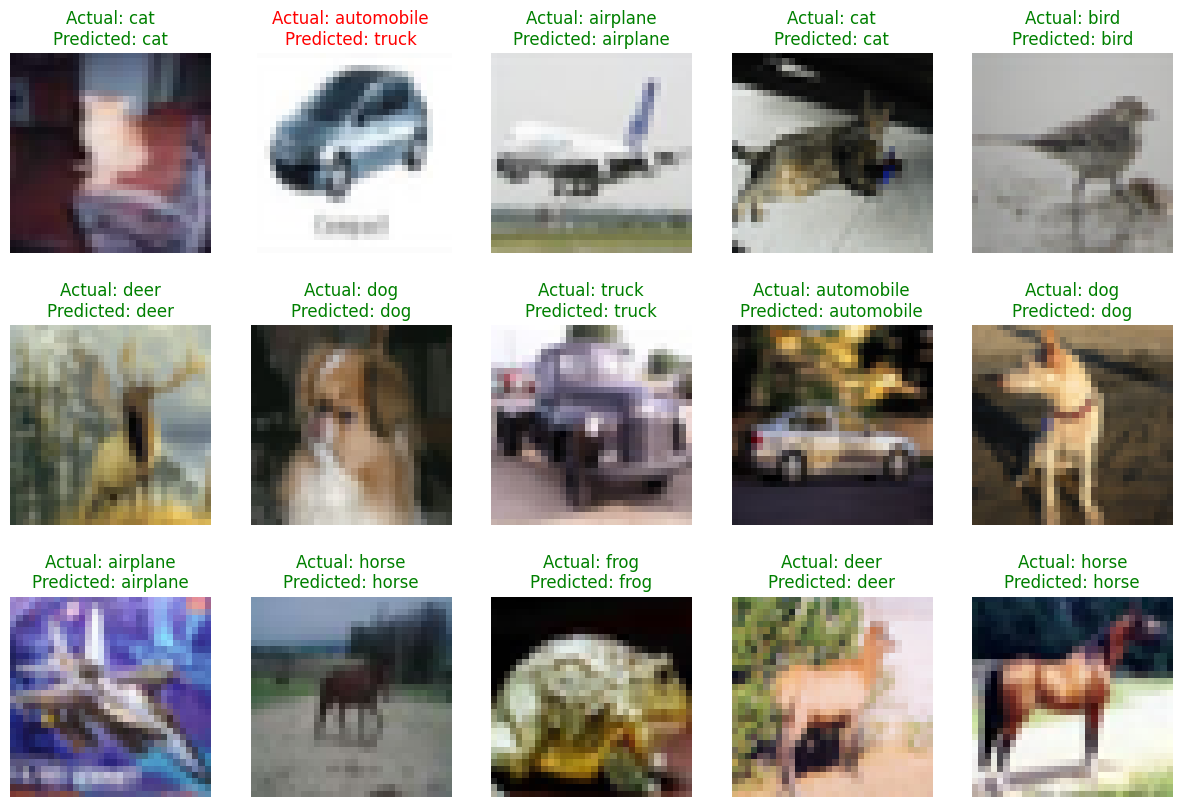

Number of correct predictions: 14/15
Accuracy: 0.9333333333333333


In [ ]:
# Predict and print images for CNN trained from scratch on training data
plot_images_with_predictions(model_scratch, train_images, train_labels, class_names)


# Prediction For Validation Using VGG16

157/157 [==============================] - 1s 7ms/step


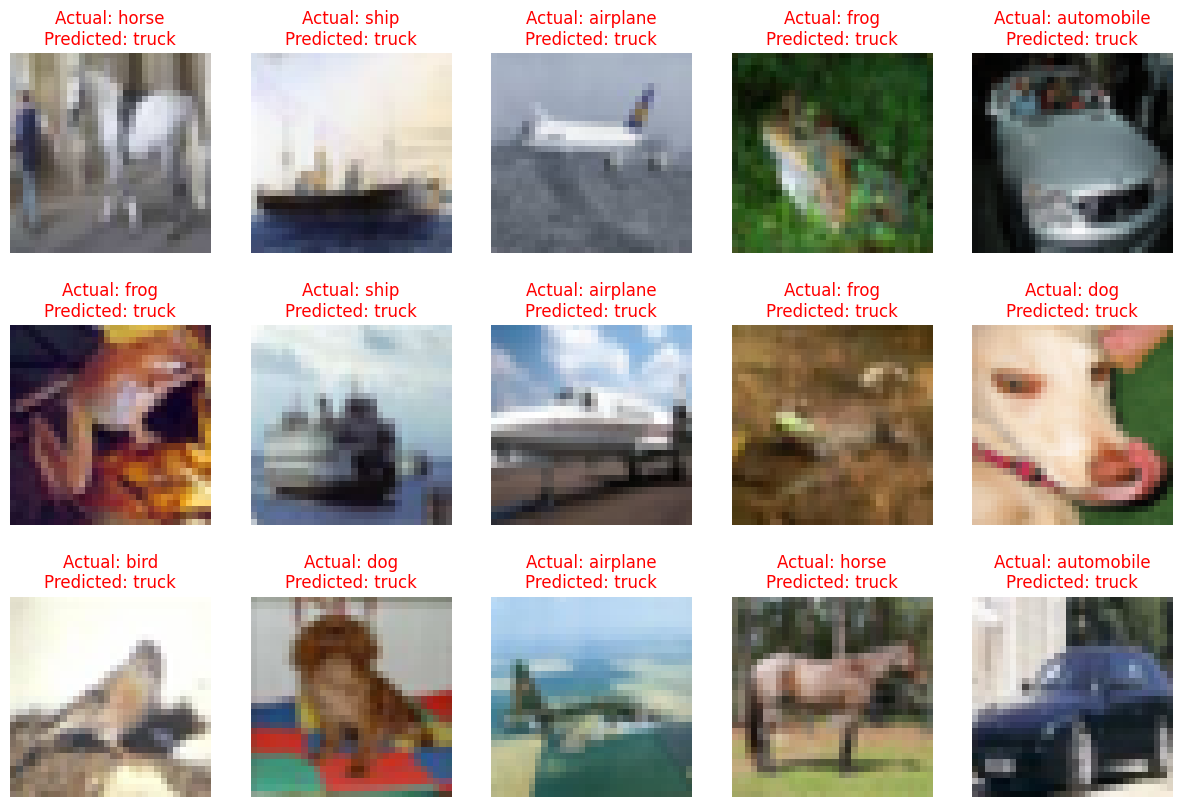

Number of correct predictions: 0/15
Accuracy: 0.0


In [ ]:
# Predict and print images for fine-tuned VGG16 on validation data
plot_images_with_predictions(model_transfer, val_images, val_labels, class_names)


# Prediction For Training Using VGG16

1407/1407 [==============================] - 10s 7ms/step


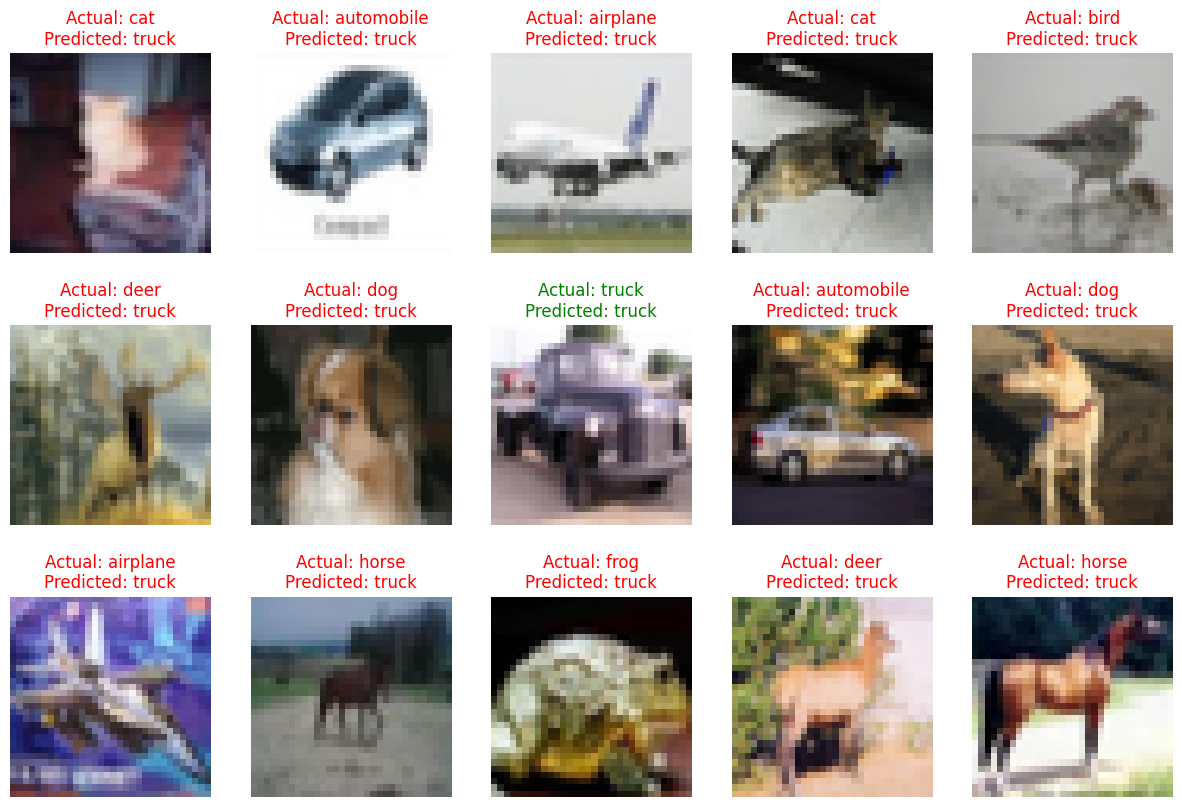

Number of correct predictions: 1/15
Accuracy: 0.06666666666666667


In [ ]:
# Predict and print images for fine-tuned VGG16 on training data
plot_images_with_predictions(model_transfer, train_images, train_labels, class_names)